In [3]:
import numpy as np

# Question 1

## 1a)

The price process of the risky asset $S^n = \{S^n_0, \ldots, S^n_n\}$ is such that $S^n_j = S_0\exp\left(jb_n + \sigma_n\sum_{l=1}^j Z_l \right)$ at time $j$, where the $Z_l$ are such that
$$
    \mathbb P[Z_l = -1] = \mathbb P[Z_l = 1] = 1/2.
$$

Thus, in the definition $S^n_j(i) = S_0u^{j-i}d^i = S_0\exp\left(jb_n + \sigma_n(j - 2i)\right)$, $i$ is the number of $l\in\{0,\ldots,j\}$ such that $Z_l = -1$.

In [7]:
S0 = 100
sigma = 0.3
r = b = 0.05
T = 2

def udcoeffs(T, n, b, sigma):
    hn = T/n
    u = np.exp(b*hn + sigma*np.sqrt(hn)),
    d = np.exp(b*hn - sigma*np.sqrt(hn))
    return u,d


def Sn(T, n, b, sigma, j):
    """
    Vector of all possible prices for the option of maturity T, at time j.
    """
    u, d = udcoeffs(T, n, b, sigma)
    indices = np.arange(0, j+1)
    return S0*np.power(u, j-indices)*np.power(d, indices)

n = 3
snj = Sn(T, n, b, sigma, 2)
print(snj)

[174.46685854 106.89391057  65.49271428]


## 1b)

In [29]:
def Payoffn(T, n, b, sigma, K):
    """
    Compute the Payoff of an European call option with maturity T,
    and strike K.
    """
    ## current time is maturity, j=n
    snT = Sn(T, n, b, sigma, n)
    delta = snT - K
    vals = np.stack([delta, np.zeros_like(delta)])
    return np.max(vals, 0) # Maximum selon la première dimension, donc les valeurs max(snT-K, 0)

K = 72
Payoffn(T, 3, b, sigma, K)

array([158.44612609,  69.19178737,  14.50664326,   0.        ])

## 1c)

The underlying probability distribution of the number $i\in\{0,\ldots,j\}$ of $l$s such that $Z_l = -1$ is the binomial distribution $\mathcal B(n,p)$ with $p=1/2$ for the standard probability law $\mathbb P$.

In [37]:
import scipy.stats

def Calln(T, n, r, b, sigma, K):
    """
    Compute the price of an European call option
    """
    p = 0.5
    dist = scipy.stats.binom(n, p)
    weights = dist.pmf(np.arange(0, n+1))
    payoff = Payoffn(T, n, b, sigma, K)
    # Price is the adjusted expected value of the payoff
    return np.exp(-r*T)*np.mean(weights*payoff)

Calln(T, n, r, b, sigma, K)

11.580262475923083

## 1d)

Under the new probability $\mathbb Q_n$ and conditionally to the knowledge of the price process up to time $j=k$, we can deduce $S^n_{k+1} = u S^n_{k}$ with probability $q_n$ because it is exactly the probability that $Z_n = 1$. Conversely
$$
    \mathbb Q_n \left[ S^n_{k+1} = d S^n_{k} \,|\, \mathcal F^n_{k} \right] = 1-q_n.
$$

Thus,
$$
    \mathbb E^{\mathbb Q_n}_{k}\left[ B^n_{k+1} \right] = q_n(u S^n_{k} - K)^+ + (1 - q_n)(dS^n_{k} - K)^+
$$

In [44]:
def Deltan(T, n, r, b, sigma, K, j):
    """
    """
    # Price process at current time j
    snj = Sn(T, n, b, sigma, j)
    u, d = udcoeffs(T, n, b, sigma)
    hn = T/n
    rn = np.exp(r*hn)
    # Risk neutral probability
    qn = (rn - d)/(u - d)
    
    zeros = np.zeros_like(snj)
    bnju = np.max(np.stack([u*snj-K, zeros]), 0)
    bnjd = np.max(np.stack([d*snj-K, zeros]), 0)
    bnj = qn*bnju + (1-qn)*bnjd
    thenj = (bnju - bnjd)/(u*snj - d*snj)
    return bnj, thenj

In [45]:
Deltan(T, n, r, b, sigma, K, 1)

(array([64.56297  , 15.3207687]), array([1.        , 0.84282373]))

In [46]:
n = 50

K_values = [80+i for i in range(41)]

In [48]:
call_values = [Calln(T, n, r, b, sigma, K) for K in K_values]

In [49]:
import matplotlib.pyplot as plt

Text(0,0.5,'Price')

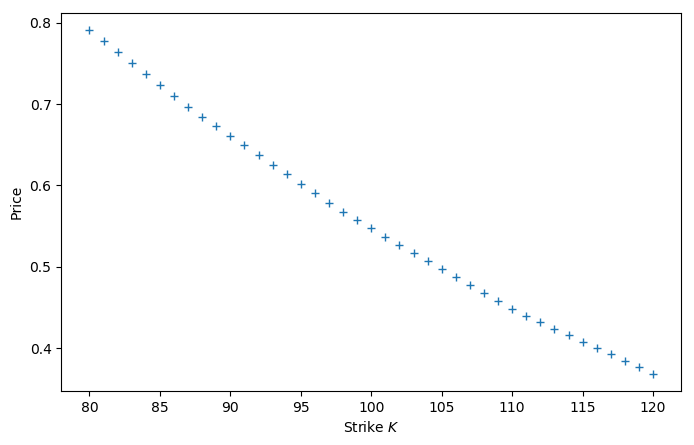

In [67]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(K_values, call_values, '+')
plt.xlabel("Strike $K$")
plt.ylabel("Price")

The option price for the European call option is convex and decreasing in the strike $K$, as expected as per the properties of such call options.